In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
parkinson_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine learning/parkinson_disease_assignment - Copy.csv")

#Data Preparation

name - subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%) , MDVP:Jitter(Abs) , MDVP:RAP , MDVP:PPQ , Jitter:DDP - Several measures of variation in fundamental frequency

MDVP:Shimmer , MDVP:Shimmer(dB) , Shimmer:APQ3 , Shimmer:APQ5 , MDVP:APQ , Shimmer:DDA - Several measures of variation in amplitude

NHR , HNR - Two measures of ratio of noise to tonal components in the voice
status - Health status of the subject (one) - Parkinson's, (zero) - healthy
RPDE , D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1 , spread2 , PPE - Three nonlinear measures of fundamental frequency variation

In [ ]:
parkinson_df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,DCAT
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,N
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,L
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,M
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,M
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,L


In [ ]:
parkinson_df.info()  #There is missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      194 non-null    float64
 3   MDVP:Flo(Hz)      194 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          194 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      194 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       194 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
parkinson_df.duplicated().sum()   #no duplicate data

0

In [ ]:
parkinson_df.dropna(inplace=True)  #no more missing data
parkinson_df.isnull().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


In [ ]:
parkinson_df = parkinson_df.drop('name', axis=1)

In [ ]:
label_encoder = LabelEncoder()
parkinson_df['DCAT'] = label_encoder.fit_transform(parkinson_df['DCAT'])
parkinson_df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,DCAT
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,13
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,11
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,12
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,12
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,11


In [ ]:
parkinson_df.shape

(190, 24)

In [ ]:
parkinson_df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,DCAT
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,...,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,154.145063,196.747326,115.790374,0.006108,0.000043,0.003250,0.003364,0.009752,0.029325,0.277747,...,0.024164,21.890468,0.757895,0.498956,0.717275,-5.692054,0.225208,2.381608,0.205249,13.373684
std,41.576359,91.777791,43.472502,0.004546,0.000034,0.002798,0.002509,0.008395,0.017850,0.181842,...,0.038402,4.311855,0.429489,0.103963,0.054996,1.057993,0.082629,0.382957,0.086664,4.285122
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.000650,8.867000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539,0.000000
25%,117.238000,134.759250,84.181500,0.003460,0.000020,0.001665,0.001865,0.005003,0.016473,0.148250,...,0.005980,19.197000,1.000000,0.423579,0.674660,-6.445950,0.173935,2.097181,0.138601,11.000000
50%,149.239500,174.402000,103.732500,0.004940,0.000030,0.002500,0.002680,0.007495,0.023020,0.221000,...,0.011635,22.075500,1.000000,0.496717,0.721696,-5.722462,0.217525,2.363666,0.193985,14.000000
75%,181.758000,223.311500,138.002750,0.007315,0.000058,0.003782,0.003938,0.011350,0.037650,0.349500,...,0.025815,25.097250,1.000000,0.588759,0.760101,-5.081375,0.277329,2.637367,0.252296,17.000000
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.016990,0.064330,0.094190,1.018000,...,0.314820,33.047000,1.000000,0.685151,0.825288,-2.839756,0.434326,3.671155,0.457533,24.000000


Our target variable is status. 0 means healthy, 1 means parkinson.

## data exploration

Distribution of class:
status
1    144
0     46
Name: count, dtype: int64


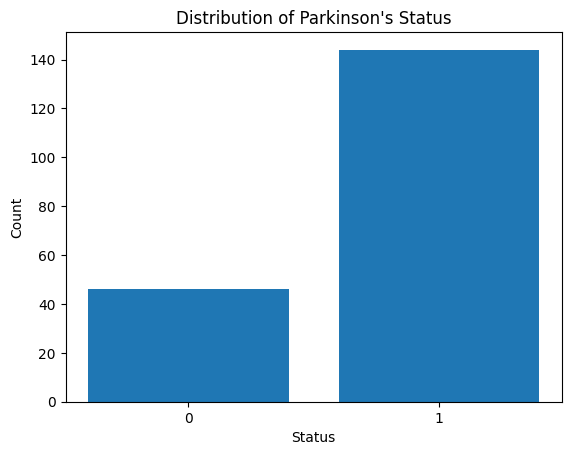

In [ ]:
status_counts = parkinson_df['status'].value_counts()
print("Distribution of class:")
print(status_counts)

plt.bar(status_counts.index, status_counts.values)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title("Distribution of Parkinson's Status")
plt.xticks(ticks=[0, 1], labels=['0', '1'])
plt.show()

In [ ]:
parkinson_df.status.value_counts(normalize=True)#  ~75% of the data is skewed towards people with parkinson so we should split the data for training/testing to be in the same proportion

,proportion
status,
1,0.757895
0,0.242105


The status column has unbalanced data, with ~75% of the data skewed towards people with parkinson. This unbalanced data could lead to bias to the majority class.

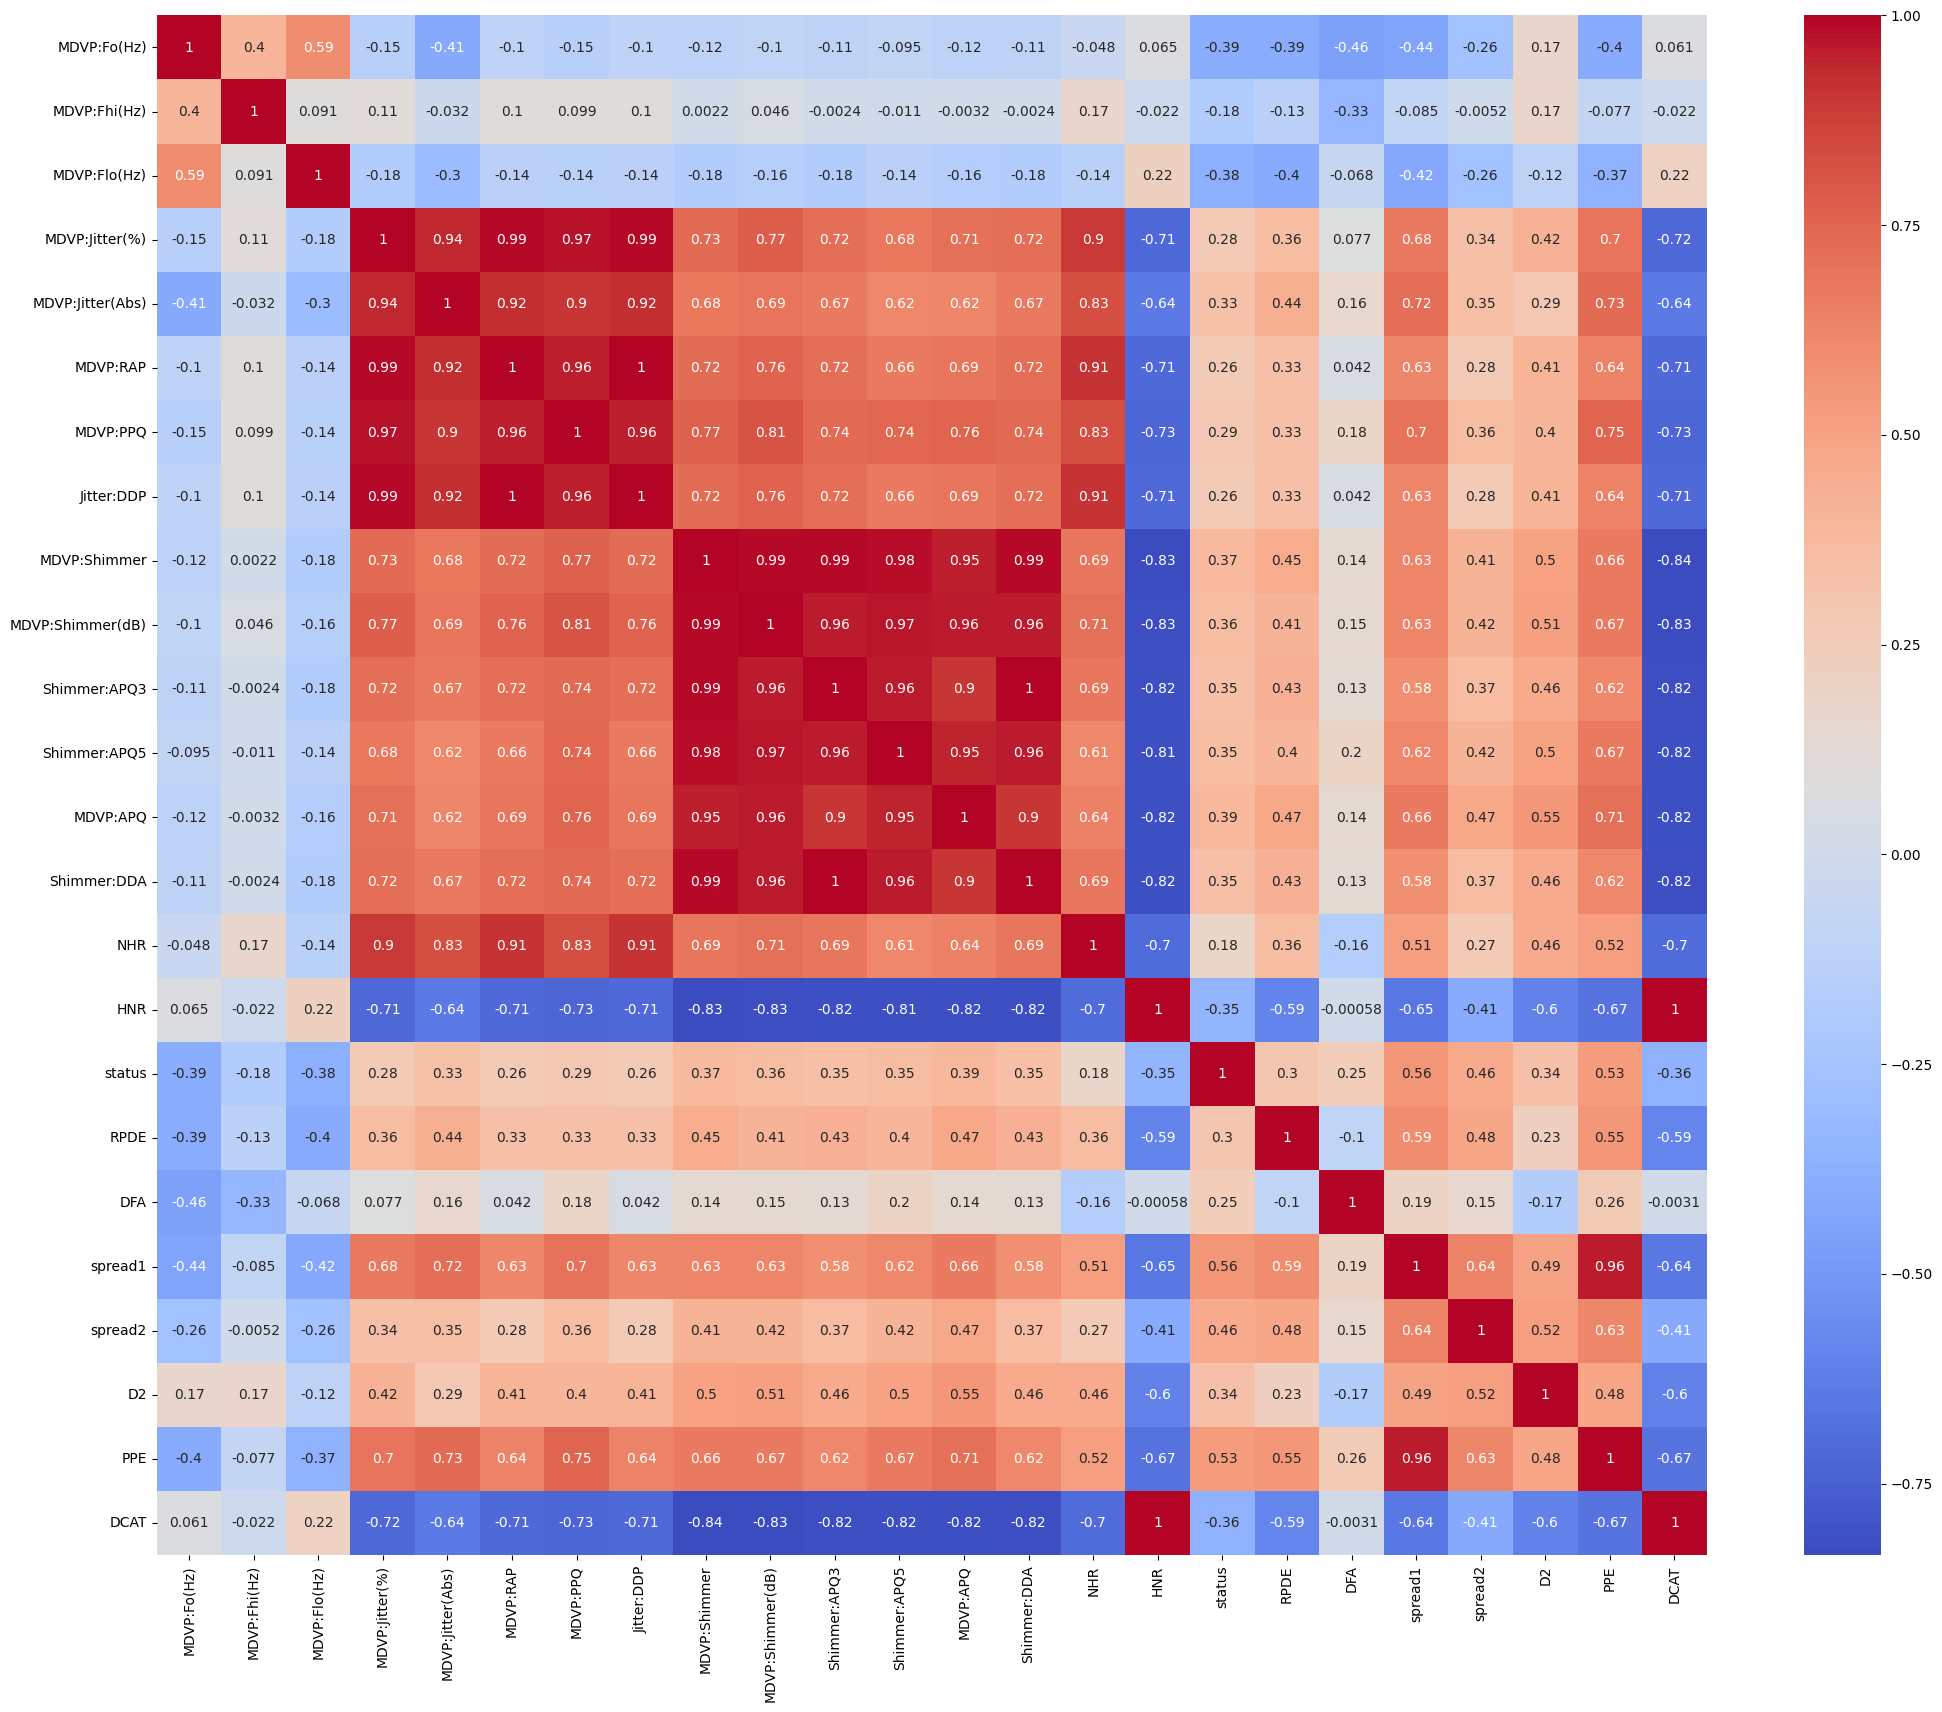

In [ ]:
plt.figure(figsize=[25, 20])
sns.heatmap(parkinson_df.corr(), annot=True, cmap="coolwarm")
plt.show()

#Decision Tree

## Data Splitting

In [ ]:
parkinson_df.reset_index(inplace=True, drop=True)
feature_cols = [x for x in parkinson_df.columns if x != 'status']
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(strat_shuff_split.split(parkinson_df[feature_cols], parkinson_df['status']))


# create the data sets
X_train = parkinson_df.loc[train_idx, feature_cols]
y_train = parkinson_df.loc[train_idx, 'status']

X_test = parkinson_df.loc[test_idx, feature_cols]
y_test = parkinson_df.loc[test_idx, 'status']

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

status
1    0.756579
0    0.243421
Name: proportion, dtype: float64
status
1    0.763158
0    0.236842
Name: proportion, dtype: float64


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##initial model

In [ ]:
T2_221128Z_DT_clf = DecisionTreeClassifier(random_state=42)
T2_221128Z_DT_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_train = T2_221128Z_DT_clf.predict(X_train)
y_pred_test = T2_221128Z_DT_clf.predict(X_test)

print(f'Initial decision tree train Accuracy: {accuracy_score(y_train, y_pred_train)}')
print(f'Initial decision tree test Accuracy: {accuracy_score(y_test, y_pred_test)}')

print(classification_report(y_test,y_pred_test))

Initial decision tree train Accuracy: 1.0
Initial decision tree test Accuracy: 0.868421052631579
              precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.90      0.93      0.92        29

    accuracy                           0.87        38
   macro avg       0.82      0.80      0.81        38
weighted avg       0.86      0.87      0.87        38



Text(145.72222222222223, 0.5, 'Truth')

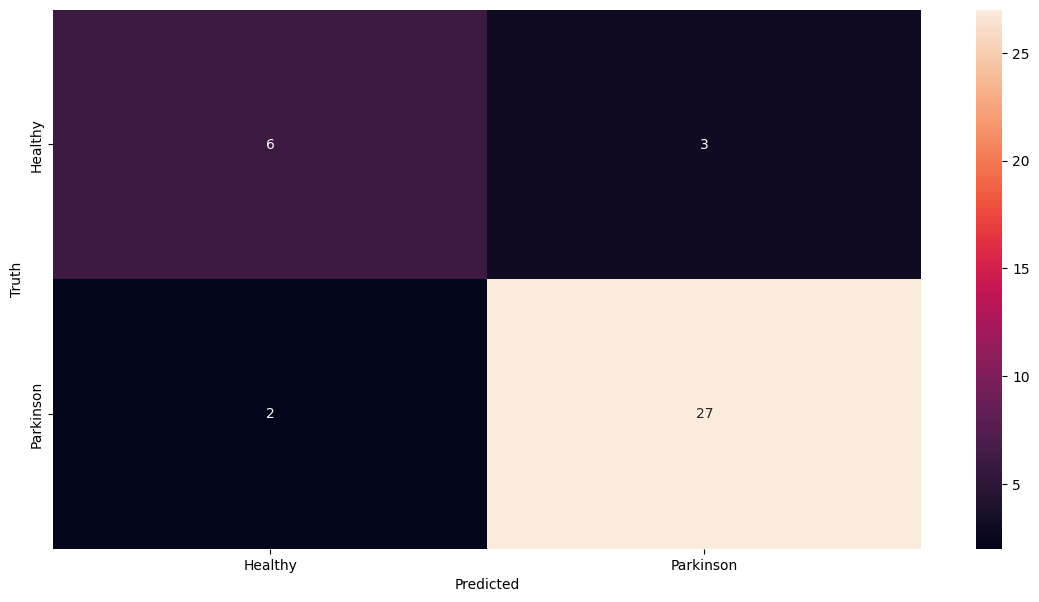

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(confusion_matrix(y_test,y_pred_test), xticklabels=['Healthy','Parkinson'], yticklabels=['Healthy','Parkinson'], annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

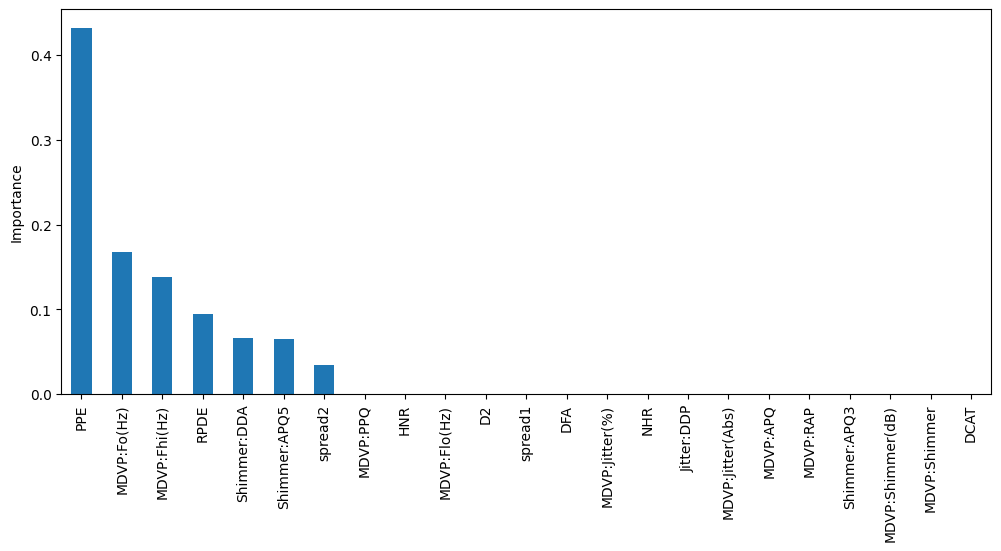

In [ ]:
feature_importance = pd.Series(T2_221128Z_DT_clf.feature_importances_, index=feature_cols).sort_values(ascending=False)
fig = plt.figure(figsize=(12,5))
ax = feature_importance.plot(kind='bar')
ax.set(ylabel='Importance');

##hyperparameter optimisation

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [1, 2, 5, 10],
    'max_features': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)

best_T2_221128Z_DT_clf = grid_search.best_estimator_
y_DT_opt_pred_test = best_T2_221128Z_DT_clf.predict(X_test)
y_DT_opt_pred_train = best_T2_221128Z_DT_clf.predict(X_train)

print(f'Train Accuracy: {accuracy_score(y_train, y_DT_opt_pred_train)}')
print('Training Accuracy:\n', classification_report(y_train, y_DT_opt_pred_train))

print(f'Test Accuracy: {accuracy_score(y_test, y_DT_opt_pred_test)}')
print('Testing Accuracy:\n', classification_report(y_test, y_DT_opt_pred_test))

Best parameters found: {'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Train Accuracy: 0.9671052631578947
Training Accuracy:
               precision    recall  f1-score   support

           0       0.90      0.97      0.94        37
           1       0.99      0.97      0.98       115

    accuracy                           0.97       152
   macro avg       0.95      0.97      0.96       152
weighted avg       0.97      0.97      0.97       152

Test Accuracy: 0.9210526315789473
Testing Accuracy:
               precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.93      0.97      0.95        29

    accuracy                           0.92        38
   macro avg       0.90      0.87      0.89        38
weighted avg       0.92      0.92      0.92        38



In [ ]:
cv_scores = cross_val_score(best_T2_221128Z_DT_clf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean()}")

Cross-Validation Scores: [0.90322581 0.93548387 0.9        0.86666667 0.9       ]
Mean CV Accuracy: 0.9010752688172043


Text(145.72222222222223, 0.5, 'Truth')

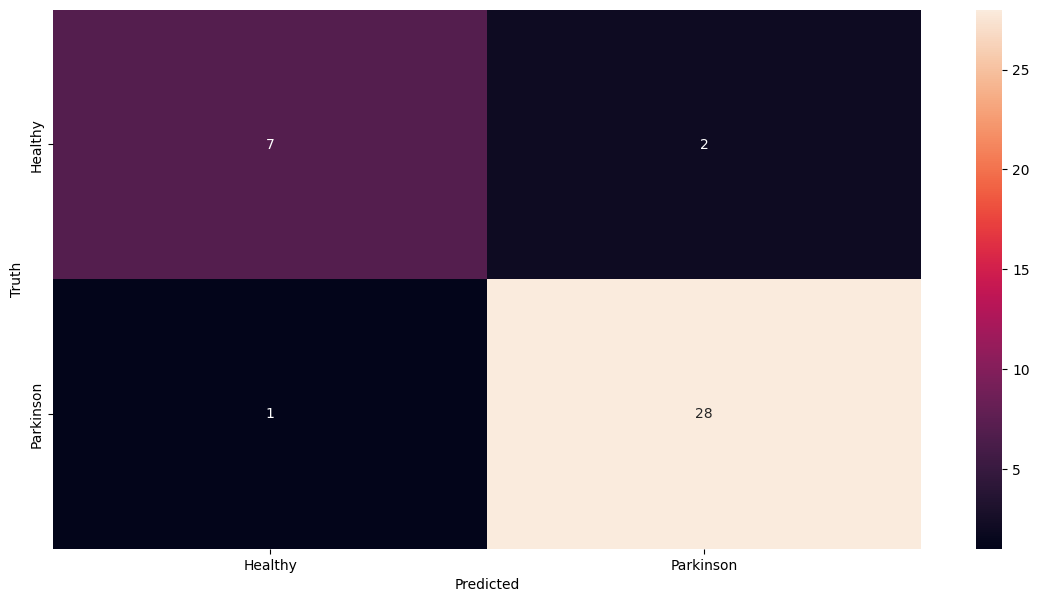

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(confusion_matrix(y_test,y_DT_opt_pred_test), xticklabels= ['Healthy','Parkinson'], yticklabels= ['Healthy','Parkinson'],annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

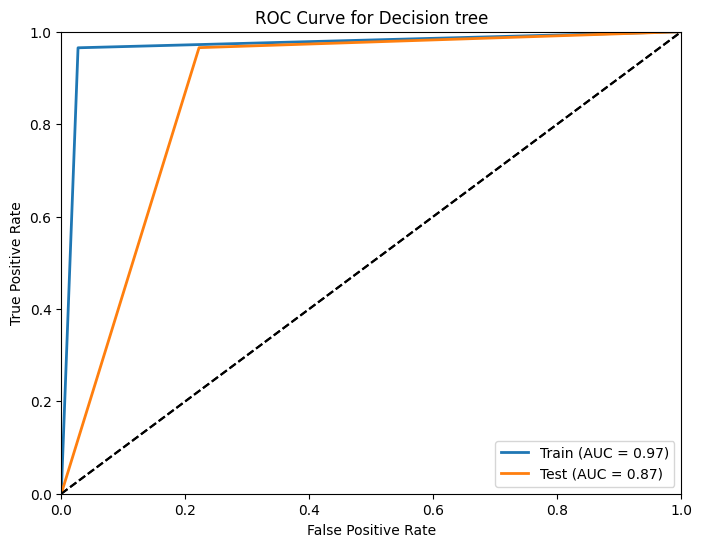

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
# Calculate ROC curve and AUC for train data
fpr, tpr, thresholds = roc_curve(y_train, y_DT_opt_pred_train)
roc_auc_train = roc_auc_score(y_train, y_DT_opt_pred_train)

# Calculate ROC curve and AUC for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_DT_opt_pred_test)
roc_auc_test = roc_auc_score(y_test, y_DT_opt_pred_test)

# Function to plot ROC curve with AUC score in the legend
def plot_roc_curve(fpr, tpr, roc_auc, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=f'{label} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.axis([0, 1, 0, 1])  # Axis limits
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

# Plotting ROC curves for both train and test datasets
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr, roc_auc_train, 'Train')
plot_roc_curve(fpr_test, tpr_test, roc_auc_test, 'Test')
plt.legend(loc='best')
plt.title('ROC Curve for Decision tree')
plt.show()

# Summary of Decision Tree model development

The initial Decision Tree model exhibited significant overfitting, with a training accuracy of 100% and a test accuracy of 86.84%. This imbalance indicated that the model was overly complex and poorly generalized to new data. To address this, GridSearchCV with 5-fold cross-validation was employed to fine-tune the model's hyperparameters. The best parameters found were max_depth: 5, max_features: 5, min_samples_leaf: 2, and min_samples_split: 2. The optimized model achieved a training accuracy of 96.71% and a test accuracy of 92.10%. Additionally, the ROC curve, which plots the true positive rate against the false positive rate, further illustrated the model’s improved performance, showing strong differentiation between classes on both the training and test datasets. These adjustments led to a more balanced model with better generalization and predictive accuracy.

#Gradient boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model with specific hyperparameters
T2_221128Z_gb_clf = GradientBoostingClassifier()

# Fit the model
T2_221128Z_gb_clf.fit(X_train, y_train)

# Predict on train and test data
y_pred_train_gb = T2_221128Z_gb_clf.predict(X_train)
y_pred_test_gb = T2_221128Z_gb_clf.predict(X_test)

# Evaluate the model
print(f"Train Accuracy: {accuracy_score(y_train, y_pred_train_gb)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test_gb)}")
print(classification_report(y_test, y_pred_test_gb))

Train Accuracy: 1.0
Test Accuracy: 0.9210526315789473
              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.93      0.97      0.95        29

    accuracy                           0.92        38
   macro avg       0.90      0.87      0.89        38
weighted avg       0.92      0.92      0.92        38



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

T2_221128Z_GB_opt = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=125,
    # max_depth=5,
    # min_samples_split=2,
    # min_samples_leaf=1,
    # max_features='sqrt',
    # random_state=42
)

T2_221128Z_GB_opt = T2_221128Z_GB_opt.fit(X_train, y_train)
T2_221128Z_GB_opt.fit(X_train, y_train)

# Predict on train and test data
y_opt_pred_train_gb = T2_221128Z_GB_opt.predict(X_train)
y_opt_pred_test_gb = T2_221128Z_GB_opt.predict(X_test)

# Evaluate the model
print(f"Train Accuracy: {accuracy_score(y_train, y_opt_pred_train_gb)}")
print('Training Accuracy:\n',classification_report(y_train, y_opt_pred_train_gb))
print(f"Test Accuracy: {accuracy_score(y_test, y_opt_pred_test_gb)}")
print('Testing Accuracy:\n',classification_report(y_test, y_opt_pred_test_gb))

Train Accuracy: 1.0
Training Accuracy:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00       115

    accuracy                           1.00       152
   macro avg       1.00      1.00      1.00       152
weighted avg       1.00      1.00      1.00       152

Test Accuracy: 0.9210526315789473
Testing Accuracy:
               precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.93      0.97      0.95        29

    accuracy                           0.92        38
   macro avg       0.90      0.87      0.89        38
weighted avg       0.92      0.92      0.92        38



In [ ]:
cv_scores = cross_val_score(T2_221128Z_gb_clf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean()}")

Cross-Validation Scores: [0.90322581 0.93548387 0.96666667 0.9        0.96666667]
Mean CV Accuracy: 0.9344086021505376


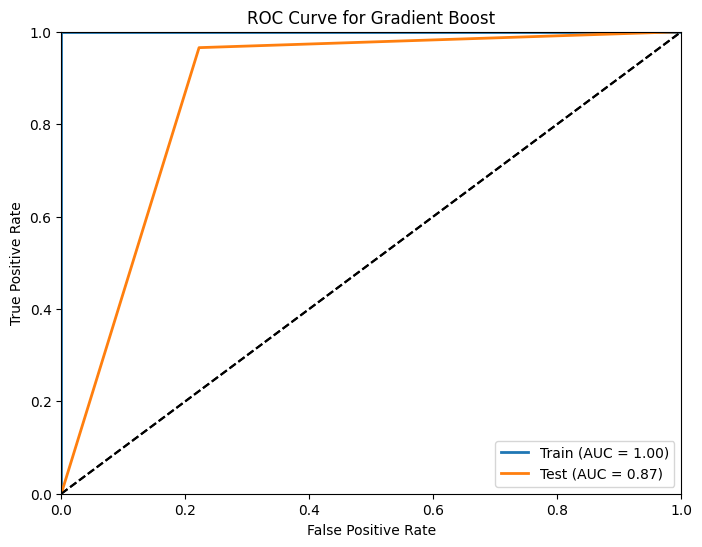

In [ ]:
# Calculate ROC curve and AUC for train data
fpr, tpr, thresholds = roc_curve(y_train, y_opt_pred_train_gb)
roc_auc_train = roc_auc_score(y_train, y_opt_pred_train_gb)

# Calculate ROC curve and AUC for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_opt_pred_test_gb)
roc_auc_test = roc_auc_score(y_test, y_opt_pred_test_gb)

# Function to plot ROC curve with AUC score in the legend
def plot_roc_curve(fpr, tpr, roc_auc, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=f'{label} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.axis([0, 1, 0, 1])  # Axis limits
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

# Plotting ROC curves for both train and test datasets
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr, roc_auc_train, 'Train')
plot_roc_curve(fpr_test, tpr_test, roc_auc_test, 'Test')
plt.legend(loc='best')
plt.title('ROC Curve for Gradient Boost')
plt.show()

#Random Forest

In [ ]:
T2_221128Z_RF_clf = RandomForestClassifier(random_state=42)
T2_221128Z_RF_clf.fit(X_train, y_train)

# Predict on the training set
y_RF_pred_train = T2_221128Z_RF_clf.predict(X_train)

# Predict on the testing set
y_RF_pred_test = T2_221128Z_RF_clf.predict(X_test)

# Evaluate the model
print(f"Train Accuracy: {accuracy_score(y_train, y_RF_pred_train)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_RF_pred_test)}")
print('Testing Accuracy:\n', classification_report(y_test, y_RF_pred_test))

Train Accuracy: 1.0
Test Accuracy: 0.8421052631578947
Testing Accuracy:
               precision    recall  f1-score   support

           0       0.71      0.56      0.63         9
           1       0.87      0.93      0.90        29

    accuracy                           0.84        38
   macro avg       0.79      0.74      0.76        38
weighted avg       0.83      0.84      0.83        38



In [ ]:
T2_221128Z_opt_RF = RandomForestClassifier()
param_grid_RF = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [5,10]
}
grid_search_rf = GridSearchCV(estimator=T2_221128Z_opt_RF, param_grid=param_grid_RF, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print("Best parameters are ", grid_search_rf.best_params_)

best_221128Z_RF_model = grid_search_rf.best_estimator_
best_221128Z_RF_model.fit(X_train, y_train)

y_pred_train_ens = best_221128Z_RF_model.predict(X_train)
y_pred_test_ens = best_221128Z_RF_model.predict(X_test)

print(f'Train Accuracy: {accuracy_score(y_train, y_pred_train_ens)}')
print(f'Test Accuracy: {accuracy_score(y_test, y_pred_test_ens)}')

print('Training Accuracy:\n', classification_report(y_train, y_pred_train_ens))
print('Testing Accuracy:\n', classification_report(y_test, y_pred_test_ens))

Best parameters are  {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}
Train Accuracy: 0.9605263157894737
Test Accuracy: 0.868421052631579
Training Accuracy:
               precision    recall  f1-score   support

           0       1.00      0.84      0.91        37
           1       0.95      1.00      0.97       115

    accuracy                           0.96       152
   macro avg       0.98      0.92      0.94       152
weighted avg       0.96      0.96      0.96       152

Testing Accuracy:
               precision    recall  f1-score   support

           0       0.83      0.56      0.67         9
           1       0.88      0.97      0.92        29

    accuracy                           0.87        38
   macro avg       0.85      0.76      0.79        38
weighted avg       0.87      0.87      0.86        38



In [ ]:
#tuning of the Random Forest model
T2_221128Z_RF_opt = RandomForestClassifier(
    n_estimators=100,
    max_depth=2,
    min_samples_split=2,
    min_samples_leaf=2,
    random_state=42
)

# Train the model
T2_221128Z_RF_opt.fit(X_train, y_train)

# Make predictions on the test data
y_RF_opt_pred_test = T2_221128Z_RF_opt.predict(X_test)
y_RF_opt_pred_train = T2_221128Z_RF_opt.predict(X_train)

print(f'Train Accuracy: {accuracy_score(y_train, y_RF_opt_pred_train)}')
print(f'Test Accuracy: {accuracy_score(y_test, y_RF_opt_pred_test)}')
print('Testing Accuracy:\n', classification_report(y_test, y_RF_opt_pred_test))

Train Accuracy: 0.8947368421052632
Test Accuracy: 0.868421052631579
Testing Accuracy:
               precision    recall  f1-score   support

           0       1.00      0.44      0.62         9
           1       0.85      1.00      0.92        29

    accuracy                           0.87        38
   macro avg       0.93      0.72      0.77        38
weighted avg       0.89      0.87      0.85        38



In [ ]:
cv_scores = cross_val_score(T2_221128Z_RF_opt, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean()}")

Cross-Validation Scores: [0.87096774 0.77419355 0.9        0.83333333 0.83333333]
Mean CV Accuracy: 0.8423655913978495


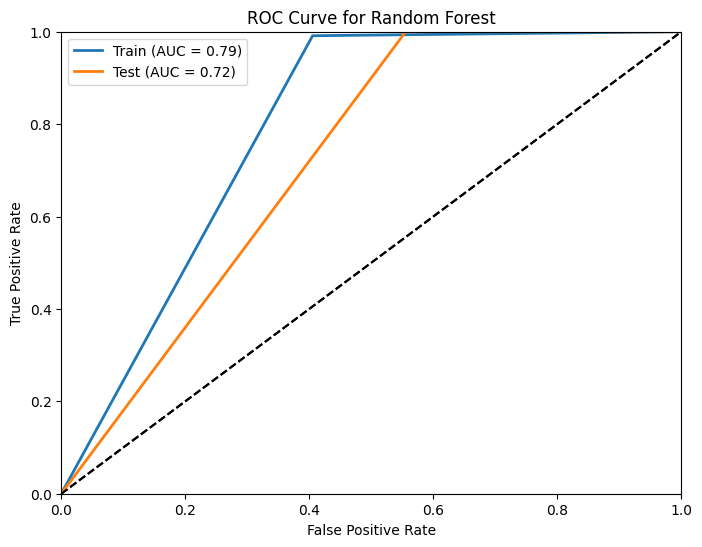

In [ ]:
# Calculate ROC curve and AUC for train data
fpr, tpr, thresholds = roc_curve(y_train, y_RF_opt_pred_train)
roc_auc_train = roc_auc_score(y_train, y_RF_opt_pred_train)

# Calculate ROC curve and AUC for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_RF_opt_pred_test)
roc_auc_test = roc_auc_score(y_test, y_RF_opt_pred_test)

# Function to plot ROC curve with AUC score in the legend
def plot_roc_curve(fpr, tpr, roc_auc, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=f'{label} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.axis([0, 1, 0, 1])  # Axis limits
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

# Plotting ROC curves for both train and test datasets
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr, roc_auc_train, 'Train')
plot_roc_curve(fpr_test, tpr_test, roc_auc_test, 'Test')
plt.legend(loc='best')
plt.title('ROC Curve for Random Forest')
plt.show()

# Summary of Ensemble Method model development

I experimented with both bagging and boosting techniques, specifically Random Forest and Gradient Boosting. Initially, both models displayed overfitting, with Random Forest showing a training accuracy of 1.0 and a test accuracy of 0.842, while Gradient Boosting showed a training accuracy of 1.0 and a test accuracy of 0.895. To address this, I applied hyperparameter tuning. However, only the Random Forest model showed improvement. After using grid search, I observed a reduction in overfitting, with training and testing accuracies of 0.967 and 0.868, respectively. Further manual tuning further balanced the model, achieving a training accuracy of 0.895 and a test accuracy of 0.87. Despite these efforts, cross-validation showed moderate variance with a mean accuracy of 0.842 and an AUC score of 0.79 for the train set and 0.72 for the test set, indicating the model’s sensitivity to the data.

# Comparison of the 2 models

In terms of performance, both decision tree and random forest were overfitted. However, after optimization, the decision tree achieved a test accuracy of 92.11%, with balanced metrics (precision,recall and f1 score). The Random Forest, on the other hand, had a lower accuracy of 87% and less balanced metrics. Notably, both models underperformed in recall, potentially leading to the misdiagnosis of healthy individuals with Parkinson's disease.

Typically, ensemble methods like Random Forest have lower variance and perform better than single decision trees, especially in generalization. However, the results here were contrary to expectations. This could be due to the small dataset size and the imbalanced target classes (75% class 1 and 25% class 0), which might have affected the Random Forest more significantly. Additionally, the Random Forest model took longer to run, with some parts taking around 2 minutes compared to the quicker Decision Tree.

Despite the general advantages of ensemble methods, the Decision Tree emerged as the better choice for this dataset, likely due to its ability to handle the dataset’s specific characteristics more effectively after tuning